In [1]:
# Fill in the wandb_id assigned to your demo run!
YOUR_ID = "52f7j6nq"
wandb_id = YOUR_ID
if wandb_id == 'YOUR_ID':
    raise ValueError('Need to provide wandb_id of demo run!')

In [2]:
%load_ext autoreload
%autoreload 2

import os
import json
import pickle
# import wandb
import pandas as pd
from matplotlib import pyplot as plt

In [28]:
# Helper Functions

# def restore_file(wandb_id, filename='wandb-summary.json'):
#     files_dir = 'notebooks/restored_files'    
#     os.system(f'mkdir -p {files_dir}')

#     api = wandb.Api()
#     run = api.run(f'semantic_uncertainty/{wandb_id}')

#     path = f'{files_dir}/{filename}'
#     os.system(f'rm -rf {path}')
#     run.file(filename).download(root=files_dir, replace=True, exist_ok=False)
#     with open(path, 'r') as f:
#         out = json.load(f)
#     return out
curr_run = "TRYINGAGAIN9"

def restore_file(filename):
    curr_dir = f"../semantic_uncertainty_no_wandb_local_deberta/cpsc4710_slz4/uncertainty/wandb/{curr_run}/files"
    with open(f"{curr_dir}/{filename}", 'r') as f:
        out = json.load(f)
    return out

def get_uncertainty_df(metrics):
    data = []
    for method in metrics['uncertainty']:
        for metric in metrics['uncertainty'][method]:
            mean = metrics['uncertainty'][method][metric]['mean']
            data.append([method, metric, mean])
    df = pd.DataFrame(data, columns=['method', 'metric', 'means'])
    main_methods = ['semantic_entropy', 'cluster_assignment_entropy', 'regular_entropy', 'semantic_energy']#, 'p_false']
    df = df.set_index('method').loc[main_methods].reset_index()
    main_names = ['Semantic entropy', 'Discrete Semantic Entropy', 'Naive Entropy', 'semantic_energy']#, 'p(False)']#, 'Embedding Regression'] # wait,, embedding regression sounds pretty cool
    conversion = dict(zip(main_methods, main_names))
    df['method'] = df.method.map(lambda x: conversion[x])
    return df

In [29]:
results = restore_file("results_dict.json")
results['uncertainty']['semantic_energy']

{'AUROC': {'mean': 0.8009302325581394,
  'bootstrap': {'std_err': 0.05698262909619114,
   'low': 0.6966142615274268,
   'high': 0.8834688346883469}},
 'area_under_thresholded_accuracy': {'mean': 0.7609738267774362,
  'bootstrap': {'std_err': 0.053708111741124026,
   'low': 0.6680995923499653,
   'high': 0.839901700843988}},
 'mean_uncertainty': {'mean': -144.35140045233467,
  'bootstrap': {'std_err': 7.806526151235834,
   'low': -157.22587542282454,
   'high': -131.83071267035854}},
 'accuracy_at_0.8_answer_fraction': {'mean': 0.7592592592592593,
  'bootstrap': {'std_err': 0.06341406033481532,
   'low': 0.6481481481481481,
   'high': 0.8518518518518519}},
 'accuracy_at_0.9_answer_fraction': {'mean': 0.7049180327868853,
  'bootstrap': {'std_err': 0.06572937843915724,
   'low': 0.5901639344262295,
   'high': 0.8032786885245902}},
 'accuracy_at_0.95_answer_fraction': {'mean': 0.671875,
  'bootstrap': {'std_err': 0.06613528340084748,
   'low': 0.5538461538461539,
   'high': 0.78125}},
 'ac

In [30]:
unc_df = get_uncertainty_df(results)

In [31]:
unc_df.head

<bound method NDFrame.head of                        method                            metric       means
0            Semantic entropy                             AUROC    0.806977
1            Semantic entropy   area_under_thresholded_accuracy    0.770683
2            Semantic entropy                  mean_uncertainty    0.567724
3            Semantic entropy   accuracy_at_0.8_answer_fraction    0.740741
4            Semantic entropy   accuracy_at_0.9_answer_fraction    0.704918
5            Semantic entropy  accuracy_at_0.95_answer_fraction    0.671875
6            Semantic entropy   accuracy_at_1.0_answer_fraction    0.632353
7   Discrete Semantic Entropy                             AUROC    0.787442
8   Discrete Semantic Entropy   area_under_thresholded_accuracy    0.753967
9   Discrete Semantic Entropy                  mean_uncertainty    0.659756
10  Discrete Semantic Entropy   accuracy_at_0.8_answer_fraction    0.722222
11  Discrete Semantic Entropy   accuracy_at_0.9_answer_fra

(0.6, 0.9)

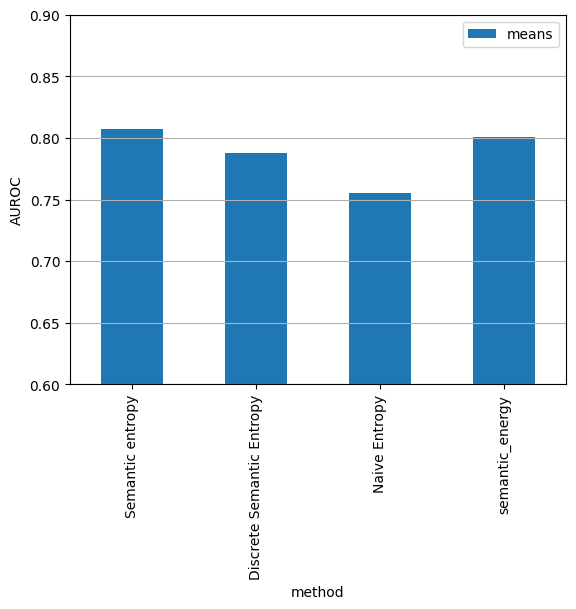

In [32]:
metric = 'AUROC'
unc_df.set_index('metric').loc[metric].plot.bar(x='method', y='means')
plt.gca().set_ylabel(metric)
plt.gca().grid(axis='y')
plt.gca().set_ylim(0.6, 0.9)